# **Sale Data Analyzing:**

## Importing Libraries:

In [1]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt

## Reading data and Merging:

In [2]:
#saving path to a variable:
path='./Sales_Data/'

#save files names:
files=(file for file in os.listdir(path) if file.endswith('.csv'))

#creating an empty data frame:
All_data=pd.DataFrame()

#read all files in a single data frame(prevents from  duplicate headers)
for i,file in enumerate(files):
  df=pd.read_csv(path+file)

  if i>0:
    df=df[1:]
    All_data=pd.concat([All_data,df])
  else:
    All_data=df

#save to new csv file
All_data.to_csv('All_data.csv',index=False)





## Reading from new file and Cleaning Data

In [3]:
df=pd.read_csv('All_data.csv')


### Dealing with NaN values:

In [4]:
df.isna().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [5]:
df.dropna(how='all',inplace=True)

In [6]:
df.isna().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

### checking for duplicate values:

In [7]:
df.duplicated().sum()

618

In [8]:
df.drop_duplicates(inplace=True)

In [9]:
df.duplicated().sum()

0

## Add column for better analysis

### change columns names and remove space:

In [10]:
df.columns=df.columns.str.replace(' ','_')

### Change order Date to datetime

In [11]:
df.dtypes

Order_ID            object
Product             object
Quantity_Ordered    object
Price_Each          object
Order_Date          object
Purchase_Address    object
dtype: object

In [12]:
df=df[df['Order_Date'].str[:2]!='Or'] #we had some rows with string values

In [13]:
df['Order_Date']=pd.to_datetime(df['Order_Date'])

C:\Users\milad\AppData\Local\Temp\ipykernel_7252\1882151666.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Order_Date']=pd.to_datetime(df['Order_Date'])


In [14]:
df['Price_Each']=df['Price_Each'].astype('float')
df['Quantity_Ordered']=df['Quantity_Ordered'].astype('int')

In [15]:
#checktypes:
df.dtypes

Order_ID                    object
Product                     object
Quantity_Ordered             int32
Price_Each                 float64
Order_Date          datetime64[ns]
Purchase_Address            object
dtype: object

In [16]:
# Adding sales column:
df['Sales']=df['Quantity_Ordered']*df['Price_Each']

In [17]:
#Adding Month Column:
df['Month']=df['Order_Date'].dt.month.astype('int')

In [18]:
#adding city:
df['City']=df['Purchase_Address'].str.split(',').str[1]
#adding State:
df['State']=df['Purchase_Address'].str.split(',').str[2].str.split().str[0]


In [19]:
df['Hours']=df['Order_Date'].dt.hour

In [20]:
display(df.dtypes)
df.head()


Order_ID                    object
Product                     object
Quantity_Ordered             int32
Price_Each                 float64
Order_Date          datetime64[ns]
Purchase_Address            object
Sales                      float64
Month                        int32
City                        object
State                       object
Hours                        int32
dtype: object

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address,Sales,Month,City,State,Hours
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",23.90,4,Dallas,TX,8
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",99.99,4,Boston,MA,22
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",600.00,4,Los Angeles,CA,14
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",11.99,4,Los Angeles,CA,14
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",11.99,4,Los Angeles,CA,9


## Analyzing Data:

### Sales per Month:

In [21]:
#SAles per month
result=df.groupby('Month').agg({'Sales':'sum'})
result


,Sales
Month,
1,1820713.16
2,2199378.08
3,2804273.35
4,3389217.98
5,3150604.24
6,2576268.20
7,2646311.32
8,2241059.39
9,2094450.33


C:\Users\milad\AppData\Local\Temp\ipykernel_7252\3660609946.py:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['{:,.0f}'.format(y) for y in ax.get_yticks()])


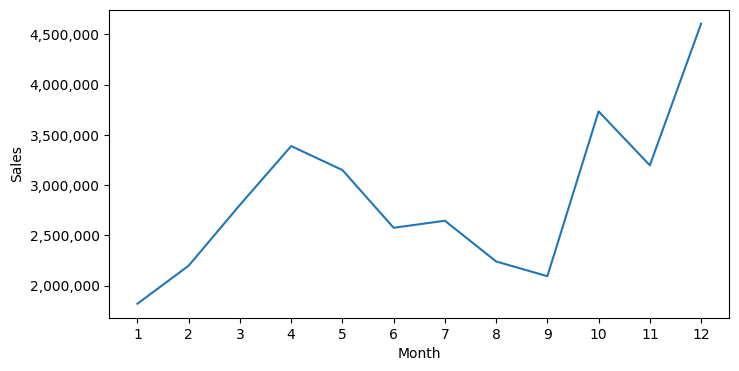

In [22]:
plt.figure(figsize=(8,4))
ax=sns.lineplot(x=result.index,y=result['Sales'])
ax.set_yticklabels(['{:,.0f}'.format(y) for y in ax.get_yticks()])
plt.xticks(result.index)
plt.show()


C:\Users\milad\AppData\Local\Temp\ipykernel_7252\290645274.py:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['{:,.0f}'.format(y) for y in ax.get_yticks()])


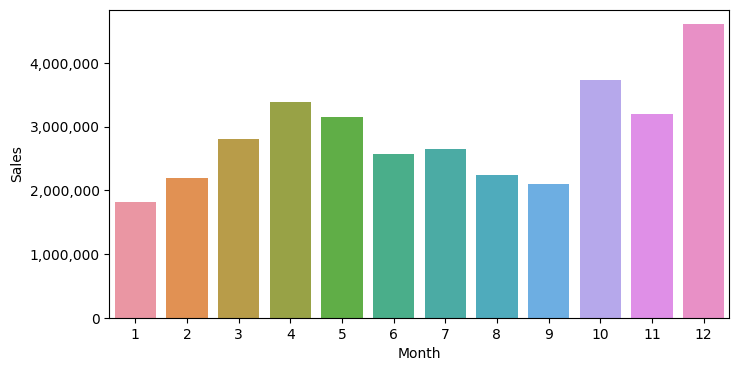

In [23]:
plt.figure(figsize=(8,4))
ax=sns.barplot(x=result.index,y=result['Sales'])
ax.set_yticklabels(['{:,.0f}'.format(y) for y in ax.get_yticks()])
plt.show()


### Quntity ordered per Month:


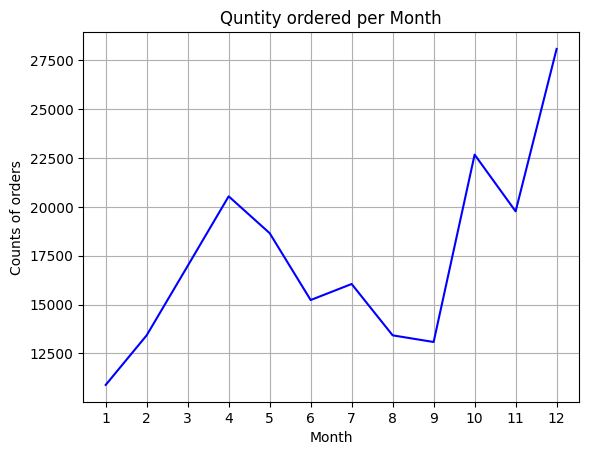

In [24]:
#Quantity ordered per month
result=df.groupby('Month').agg({'Quantity_Ordered':'sum'})
plt.title('Quntity ordered per Month')
plt.xlabel('Month')
plt.ylabel('Counts of orders')
plt.plot(result.index,result['Quantity_Ordered'],color='blue')
plt.xticks(result.index)
plt.grid(True)

# Scale 'Quantity_Ordered'

plt.show()


### Sales And Quantity per City:

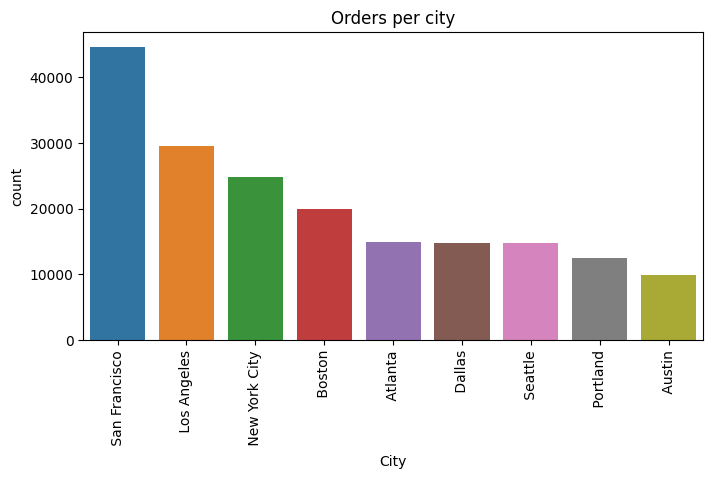

In [25]:
#Orders per city:
plt.figure(figsize=(8,4))
plt.title('Orders per city')
sns.countplot(data=df,x=df["City"],order=df['City'].value_counts().sort_values(ascending=False).index)
plt.xticks(rotation=90)
plt.show()

In [26]:
res2=df.groupby('City')['Sales'].sum()
res2


City
 Atlanta          2794049.07
 Austin           1817344.33
 Boston           3657927.65
 Dallas           2764993.97
 Los Angeles      5448288.92
 New York City    4660143.16
 Portland         2318619.99
 San Francisco    8254743.55
 Seattle          2745022.04
Name: Sales, dtype: float64

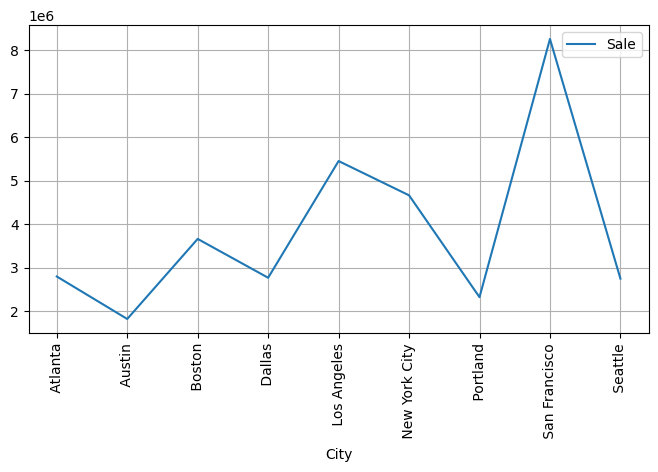

In [27]:
plt.figure(figsize=(8,4))

sns.lineplot(x=res2.index,y=res2.values,label='Sale')
plt.xticks(rotation=90)
plt.grid(True)
plt.legend()
plt.show()

### Best Hours for Advertisement:

In [28]:
HoursSales=df.groupby('Hours')['Sales'].sum()
HoursSales

Hours
0      711848.66
1      459863.90
2      234839.45
3      145742.94
4      162546.07
5      230664.87
6      447963.01
7      744067.32
8     1192309.20
9     1638772.05
10    1942608.09
11    2296619.84
12    2314359.85
13    2152369.98
14    2082498.34
15    1940623.20
16    1902373.20
17    2126541.98
18    2218374.01
19    2411959.19
20    2280084.36
21    2040090.48
22    1606219.87
23    1177792.82
Name: Sales, dtype: float64

C:\Users\milad\AppData\Local\Temp\ipykernel_7252\3587129673.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['{:,.0f}'.format(y) for y in ax.get_yticks()])


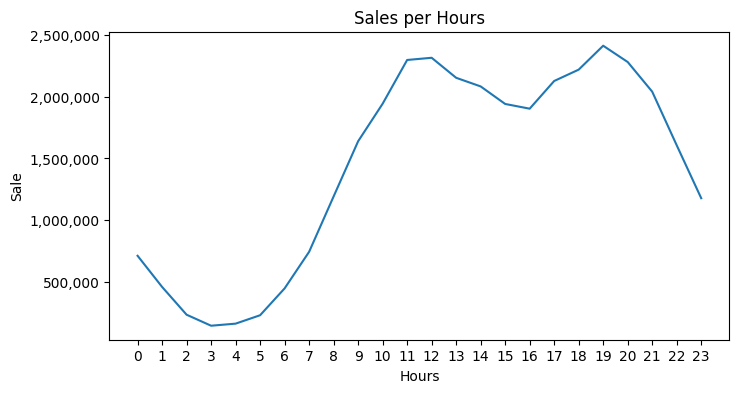

In [29]:
plt.figure(figsize=(8,4))
plt.title('Sales per Hours')
ax=sns.lineplot(x=HoursSales.index,y=HoursSales.values)
ax.set_yticklabels(['{:,.0f}'.format(y) for y in ax.get_yticks()])
plt.xticks(HoursSales.index)
plt.ylabel('Sale')
plt.show()

### top 10 Products sold(Quantity & Sale):

In [30]:
top10Q=df.groupby('Product')['Quantity_Ordered'].sum()
top10Q.sort_values(ascending=False).values

array([30986, 27611, 23930, 23169, 20520, 15636, 13430,  7541,  6844,
        6239,  6191,  5529,  4813,  4724,  4128,  4126,  2068,   666,
         646])

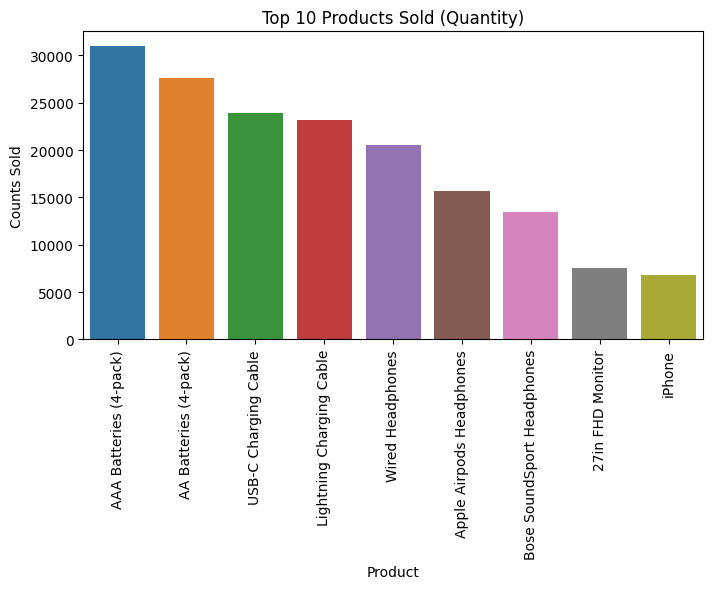

In [31]:
Top10p=plt.figure(figsize=(8,4))
sns.barplot(x=top10Q.index,y=top10Q.values,order=top10Q.sort_values(ascending=False).index[:9])
plt.xticks(rotation=90)
plt.title('Top 10 Products Sold (Quantity)')
plt.ylabel('Counts Sold')
plt.show()

C:\Users\milad\AppData\Local\Temp\ipykernel_7252\2486302099.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['{:,.0f}'.format(y) for y in ax.get_yticks()])


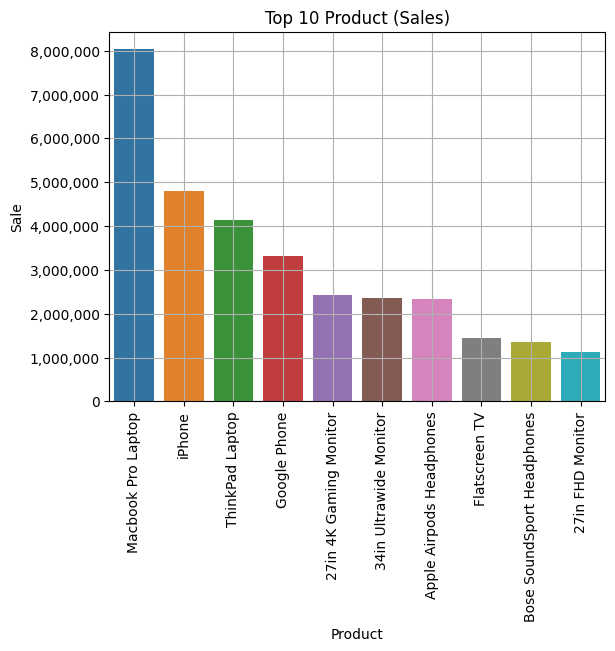

In [32]:
Top10Sold=df.groupby('Product')['Sales'].sum()
ax=sns.barplot(x=Top10Sold.index,y=Top10Sold.values,order=Top10Sold.sort_values(ascending=False).index[:10])
plt.xticks(rotation=90)
plt.title('Top 10 Product (Sales)')
plt.ylabel('Sale')
ax.set_yticklabels(['{:,.0f}'.format(y) for y in ax.get_yticks()])
plt.grid(True)
plt.show()

In [33]:

prices=df.groupby('Product')['Price_Each'].mean()
prices.sort_values(ascending=False)


Product
Macbook Pro Laptop            1700.00
ThinkPad Laptop                999.99
iPhone                         700.00
LG Dryer                       600.00
LG Washing Machine             600.00
Google Phone                   600.00
Vareebadd Phone                400.00
27in 4K Gaming Monitor         389.99
34in Ultrawide Monitor         379.99
Flatscreen TV                  300.00
Apple Airpods Headphones       150.00
27in FHD Monitor               149.99
20in Monitor                   109.99
Bose SoundSport Headphones      99.99
Lightning Charging Cable        14.95
Wired Headphones                11.99
USB-C Charging Cable            11.95
AA Batteries (4-pack)            3.84
AAA Batteries (4-pack)           2.99
Name: Price_Each, dtype: float64

In [66]:
top10Q=df.groupby('Product')['Quantity_Ordered'].sum()
top10Q.sort_values(ascending=False)[:9]
keys = top10Q.sort_values(ascending=False).head(10).index.tolist()
y=top10Q.sort_values(ascending=False).head(10)
y2=[]
for key in keys:
    y2.append(prices.get(key=key))




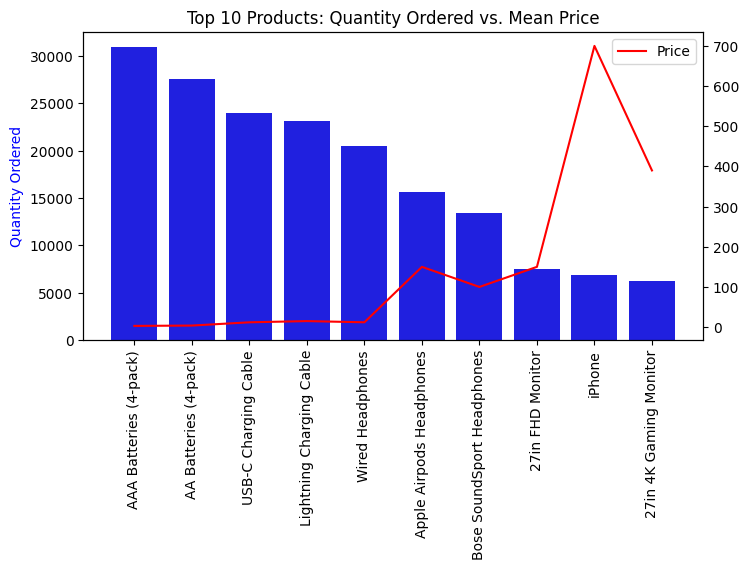

In [84]:
plt.figure(figsize=(8, 4))

# Create a bar plot for quantities ordered
ax1 = sns.barplot(x=keys, y=y, color='blue',label='Quantity')
plt.xticks(rotation=90)
ax1.set_ylabel('Quantity Ordered', color='blue')

# Create a line plot for mean prices on the secondary axis
ax2 = ax1.twinx()
ax2=sns.lineplot(x=keys,y=y2,color='red',label='Price')

plt.title('Top 10 Products: Quantity Ordered vs. Mean Price')
plt.legend()
# Display the plot
plt.show()

### comparison  for all Products between Quantity sales and price:

In [88]:
allPrice=df.groupby('Product')['Price_Each'].mean()

newkey=allPrice.index.tolist()
QuantitySAle=df.groupby('Product')['Quantity_Ordered'].sum()
allPrice

Product
20in Monitor                   109.99
27in 4K Gaming Monitor         389.99
27in FHD Monitor               149.99
34in Ultrawide Monitor         379.99
AA Batteries (4-pack)            3.84
AAA Batteries (4-pack)           2.99
Apple Airpods Headphones       150.00
Bose SoundSport Headphones      99.99
Flatscreen TV                  300.00
Google Phone                   600.00
LG Dryer                       600.00
LG Washing Machine             600.00
Lightning Charging Cable        14.95
Macbook Pro Laptop            1700.00
ThinkPad Laptop                999.99
USB-C Charging Cable            11.95
Vareebadd Phone                400.00
Wired Headphones                11.99
iPhone                         700.00
Name: Price_Each, dtype: float64

In [102]:
QuantitySAle

Product
20in Monitor                   4126
27in 4K Gaming Monitor         6239
27in FHD Monitor               7541
34in Ultrawide Monitor         6191
AA Batteries (4-pack)         27611
AAA Batteries (4-pack)        30986
Apple Airpods Headphones      15636
Bose SoundSport Headphones    13430
Flatscreen TV                  4813
Google Phone                   5529
LG Dryer                        646
LG Washing Machine              666
Lightning Charging Cable      23169
Macbook Pro Laptop             4724
ThinkPad Laptop                4128
USB-C Charging Cable          23930
Vareebadd Phone                2068
Wired Headphones              20520
iPhone                         6844
Name: Quantity_Ordered, dtype: int32

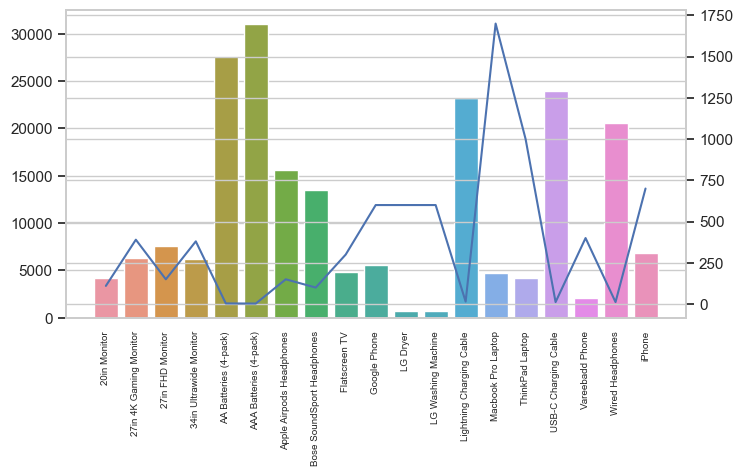

In [104]:
plt.figure(figsize=(8,4))
ax1=sns.barplot(x=newkey,y=top10Q.values)
plt.xticks(rotation=90, size=7)
ax2=ax1.twinx()
ax2=sns.lineplot(x=newkey,y=allPrice.values)
plt.show()
